# Определение перспективного тарифа для телеком компании

Заказчик — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана. Нужно определить какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет. Задача — проанализировать поведение клиентов и сделать вывод какой тариф лучше.

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Читаем предоставленные данные и задаем им названия.
users = pd.read_csv('/Users/vintera/Git/projects/my_projects/dataset/project_03/users.csv')
calls = pd.read_csv('/Users/vintera/Git/projects/my_projects/dataset/project_03/calls.csv')
internet = pd.read_csv('/Users/vintera/Git/projects/my_projects/dataset/project_03/internet.csv')
messages = pd.read_csv('/Users/vintera/Git/projects/my_projects/dataset/project_03/messages.csv')
tariffs = pd.read_csv('/Users/vintera/Git/projects/my_projects/dataset/project_03/tariffs.csv')

In [3]:
users
users.info()
users.age.describe()
users.tariff.value_counts()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

smart    351
ultra    149
Name: tariff, dtype: int64

In [4]:
calls
calls.info()
calls.duration.describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [5]:
messages
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
internet
internet.info()
internet.mb_used.describe()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [7]:
tariffs
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [8]:
# Чтобы не нагромождать общую таблицу, информацию о тарифах перенесем в справочники и при необходимости, будем пользоваться ими. 
dict_smart = {
    "messages_included": 50, 
    "gb_per_month_included": 15, 
    "minutes_included": 500,
    "rub_monthly_fee": 550,
    "rub_per_gb": 200,
    "rub_per_message": 3,
    "rub_per_minute": 3
} 
dict_ultra = {
    "messages_included": 1000, 
    "gb_per_month_included": 30, 
    "minutes_included": 3000,
    "rub_monthly_fee": 1950,
    "rub_per_gb": 150,
    "rub_per_message": 1,
    "rub_per_minute": 1
} 

### Вывод

Для исследования предоставлены пять таблиц, содержащих данные о 500 уникальных пользователях, количестве и дате совершенных звонков, отпрвавки текстовых сообщений и использования интернета, а также информация о двух тарфиных планах. При первом ознакомлении, данные не вызывают дополнительных вопросов - все имющиеся пропуски логически объяснимы, аномальные значения отсутствуют. Однако в нашей ситуации работать с одним датафреймом будет комфортнее, чем с несколькими.

## Предобработка и исследование данных

### Группировка данных и объединение таблиц

In [9]:
# Во всех таблицах, имеющих информацию о датах, приведем эти столбцы в соответствующий формат.
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [10]:
# В таблицах с информацией о звонках, сообщениях и трафике из даты пользования усулугой выделим месяц и создадим отдельный столбец для каждой таблицы.
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [11]:
calls = calls.query('duration > 0')

#### Комментарий
Несмотря на то, что данные о звонках длительностью 0 секунд хоть и дают нам небольшое представление об активности абонента, одной из главных задач исследования остается изучение сумм, затраченных абонентами на услуги связи, а так как "пустые" звонки никак не влияют на финальную стоимость, а лишь только тянут среднее и медианное значение вниз, избавимся от таких звонков.

<AxesSubplot: >

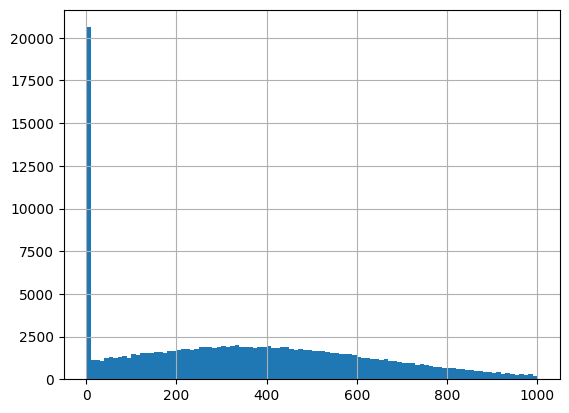

In [12]:
internet['mb_used'].hist(bins=100, range=(0, 1000), grid=True)

In [13]:
internet.query('mb_used == 0').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19598 entries, 11 to 149393
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    19598 non-null  int64         
 1   id            19598 non-null  object        
 2   mb_used       19598 non-null  float64       
 3   session_date  19598 non-null  datetime64[ns]
 4   user_id       19598 non-null  int64         
 5   month         19598 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [14]:
internet = internet.query('mb_used > 0')

#### Комментарий
При проверке данных об интернет-трафике выявлено 19598 значений, равных 0. Что означают нулевые сессии, можно только гадать, так как связаться со сборщиками данных не представляется возможным. Можно предположить, что таким образом обозначаются сессии, с исходящим трафиком. В любом случае, на общую стоимость услуги за месяц такие данные никак не повлияют, поэтому можно избавиться от нулевых значений.

In [15]:
# Данные о длительности звонков округлим в бо́льшую сторону, исходя из правил оператора.
calls['duration'] = np.ceil(calls['duration'])

In [16]:
# Информацию о звонках сгруппируем по пользователям и месяцам, общее колличество минут суммируем по месяцам.
grouped_calls = calls.groupby(['user_id', 'month']).agg({'duration': ['sum', 'count']}).reset_index()
grouped_calls.columns = ['user_id', 'month', 'cons_minutes', 'num_of_cal']

In [17]:
# Сгруппируем данные об отправленных сообщениях по пользователям и месяцам, количество сообщений получим подсчетом дат отправки.
grouped_sms = messages.groupby(['user_id', 'month']).agg({'message_date': 'count'}).reset_index()
grouped_sms.columns = ['user_id', 'month', 'cons_sms']

In [18]:
grouped_internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
grouped_internet['mb_used'] = (grouped_internet['mb_used'] / 1024).apply(np.ceil)
grouped_internet.columns = ['user_id', 'month', 'cons_traffic_gb']

#### Комментарий
Информацию об израсходованном трафике так же сгруппируем по пользователям и месяцам, общее колличество трафика суммируем по месяцам. Конвертируем значения в гигабайты, поделив их на 1024 и по правилам Заказчика, округлим значения в бОльшую сторону.

In [19]:
# В таблице с тарифами конвертируем мегабайты в гигабайты. И немного подредактируем названия столбцов.
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs.columns = ['sms_incl', 'gb_incl', 'min_incl', 'subscript_fee', 'rub_per_gb', 'rub_per_sms', 'rub_per_min', 'tariff']

In [20]:
# Соединяем сгруппированные ранее таблицы методом .merge, привязывая их друг к другу по пользователям и месяцам. Получившейся таблице присваиваем имя data.

cal_sms = grouped_calls.merge(grouped_sms, on=('user_id', 'month'), how='outer')
# звонки + сообщения
cal_sms_int = cal_sms.merge(grouped_internet, on=('user_id', 'month'), how='outer')
# звонки + сообщения + интернет
data = users.merge(cal_sms_int, on= 'user_id', how='outer')
# пользователи + звонки + сообщения + интернет

### Работа с пропусками

In [21]:
# Удалим две строки с абонентами, которые не пользовались услугами оператора.
data.query('month.isna()')
data.dropna(subset=['month'], inplace=True)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,cons_minutes,num_of_cal,cons_sms,cons_traffic_gb
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaN,NaN,NaN,NaN,NaN
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaN,NaN,NaN,NaN,NaN


In [22]:
# Можно предположить, что пропуски в столбцах, содержащих информацию о количестве израсходованных минут, сообщений и интернет-трафика, подразумевают, что абонент не пользовался данными услугами. 
# Заменяем их на 0.
data['cons_minutes'] = data['cons_minutes'].fillna(0)
data['num_of_cal'] = data['num_of_cal'].fillna(0)
data['cons_sms'] = data['cons_sms'].fillna(0)
data['cons_traffic_gb'] = data['cons_traffic_gb'].fillna(0)

### Подсчет и добавление новых данных

In [23]:
# Создадем функцию для подсчета стоимости звонков сверх тарифного пакета. 
# Результаты подсчета добавим в новый столбец.

def min_overlmt_fee(row):
    tariff = row['tariff']
    minutes = row['cons_minutes']
    
    if 'ultra' in tariff:
        if minutes <= dict_ultra["minutes_included"]:
            return 0
        return minutes - dict_ultra["minutes_included"]
    else:
        if minutes <= dict_smart["minutes_included"]:
            return 0
        return (minutes - dict_smart["minutes_included"]) * 3

data['min_overlimit_fee'] = data.apply(min_overlmt_fee, axis=1)

In [24]:
def sms_overlmt_fee(row):
    tariff = row['tariff']
    sms = row['cons_sms']
    
    if 'ultra' in tariff:
        if sms <= dict_ultra["messages_included"]:
            return 0
        return sms - dict_ultra["messages_included"]
    else:
        if sms <= dict_smart["messages_included"]:
            return 0
        return (sms - dict_smart["messages_included"]) * 3

data['sms_overlimit_fee'] = data.apply(sms_overlmt_fee, axis=1)

In [25]:
def gb_overlmt_fee(row):
    tariff = row['tariff']
    gb = row['cons_traffic_gb']
    
    if 'ultra' in tariff:
        if gb <= dict_ultra["gb_per_month_included"]:
            return 0
        return (gb - dict_ultra["gb_per_month_included"]) * 150
    else:
        if gb <= dict_smart["gb_per_month_included"]:
            return 0
        return (gb - dict_smart["gb_per_month_included"]) * 200

data['gb_overlimit_fee'] = data.apply(gb_overlmt_fee, axis=1)

In [26]:
data['total_overlimit_fee'] = data['min_overlimit_fee'] + data['sms_overlimit_fee'] + data['gb_overlimit_fee']

#### Комментарий
Для данных о сообщениях и интернет трафике применяем аналогичную функцию и добавляем столбцы с суммой переплаты к таблице. Создаем столбец с общей суммой переплаты по всем трем услугам.

In [27]:
def total_fee(row):
    tariff = row['tariff']
    over_limit_fee = row['total_overlimit_fee']
    
    if 'ultra' in tariff:
        return over_limit_fee + dict_ultra["rub_monthly_fee"] # абонентская плата по тарифу ультра
    return over_limit_fee + dict_smart["rub_monthly_fee"] # абонентская плата по тарифу смарт

data['total_fee'] = data.apply(total_fee, axis=1)

#### Комментарий
Используя аналогичную функцию подсчитаем полную сумму средств, затраченных абонентом на услуги связи за текущий месяц.

### Изменение типов данных

In [28]:
# Столбцам с информацией о месяце, количестве израсходованных минут, сообщений и интернет-трафика присвоим числовой тип данных.
data = data.astype({'month': int, 
                    'cons_minutes': int, 
                    'num_of_cal': int, 
                    'cons_sms': int, 
                    'cons_traffic_gb': int, 
                    'min_overlimit_fee': int, 
                    'sms_overlimit_fee': int, 
                    'gb_overlimit_fee': int, 
                    'total_overlimit_fee': int, 
                    'total_fee': int})

In [29]:
data
data.info()
data.describe()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,cons_minutes,num_of_cal,cons_sms,cons_traffic_gb,min_overlimit_fee,sms_overlimit_fee,gb_overlimit_fee,total_overlimit_fee,total_fee
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159,17,22,3,0,0,0,0,1950
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172,28,60,23,0,0,0,0,1950
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340,41,75,14,0,0,0,0,1950
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408,42,81,14,0,0,0,0,1950
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466,46,57,15,0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,247,30,42,21,0,0,1200,1200,1750
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,70,8,11,2,0,0,0,0,550
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,449,44,48,18,0,0,600,600,1150
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,612,62,59,18,336,27,600,963,1513


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              3214 non-null   int64         
 1   age                  3214 non-null   int64         
 2   churn_date           187 non-null    datetime64[ns]
 3   city                 3214 non-null   object        
 4   first_name           3214 non-null   object        
 5   last_name            3214 non-null   object        
 6   reg_date             3214 non-null   datetime64[ns]
 7   tariff               3214 non-null   object        
 8   month                3214 non-null   int64         
 9   cons_minutes         3214 non-null   int64         
 10  num_of_cal           3214 non-null   int64         
 11  cons_sms             3214 non-null   int64         
 12  cons_traffic_gb      3214 non-null   int64         
 13  min_overlimit_fee    3214 non-nul

,user_id,age,month,cons_minutes,num_of_cal,cons_sms,cons_traffic_gb,min_overlimit_fee,sms_overlimit_fee,gb_overlimit_fee,total_overlimit_fee,total_fee
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,46.641568,8.317362,451.244866,50.713752,38.281269,17.299004,86.564095,12.067206,451.384568,550.015868,1529.076229
std,144.659172,16.586109,2.905413,241.909978,26.951413,36.148326,7.400584,219.231515,34.526748,684.137633,767.771509,798.251091
min,1000.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1125.000000,32.000000,6.000000,282.000000,32.000000,9.000000,13.000000,0.000000,0.000000,0.000000,0.000000,750.000000
50%,1253.000000,46.000000,9.000000,443.000000,50.000000,30.000000,17.000000,0.000000,0.000000,0.000000,163.500000,1653.500000
75%,1378.750000,62.000000,11.000000,589.000000,66.000000,57.000000,21.000000,0.000000,0.000000,800.000000,938.000000,1950.000000
max,1499.000000,75.000000,12.000000,1673.000000,190.000000,224.000000,49.000000,2805.000000,279.000000,4600.000000,6220.000000,6770.000000


### Вывод

В данном разделе информация об использовании услуг была сгруппирована по месяцам и пользовательским идентификаторам, затем, полученные данные из четырех таблиц были объединены по этим столбцам. Образовавшиеся пропуски, указывавшие на неиспользование услуги были заменены на 0. Были удалены два пользователя, информация о которых не представляет интерес. Произведен подсчет переплаты за использование услуг сверх тарифного пакета. В итоге была получена таблица, состоящая из 18 столбцов и 3214 строк, содержащая данные, необходимые для дальнейшего анализа.

## Исследовательский анализ данных (EDA)

In [30]:
smart = data.query('tariff == "smart"')
ultra = data.query('tariff == "ultra"')

### Длительность разговоров

Данные о длительности разговоров абонентов с тарифом "Смарт"
_____________________________________________________________________


count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: cons_minutes, dtype: float64

Дисперсия равна: 36219.31578434428


Данные о длительности разговоров абонентов с тарифом "Ультра"
_____________________________________________________________________


count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: cons_minutes, dtype: float64

Дисперсия равна: 100873.63339730098


<AxesSubplot: title={'center': 'Длительность разговоров'}, ylabel='Frequency'>

Text(0.5, 0, 'Длительность разговоров (мин.)')

Text(0, 0.5, 'Общее количество')

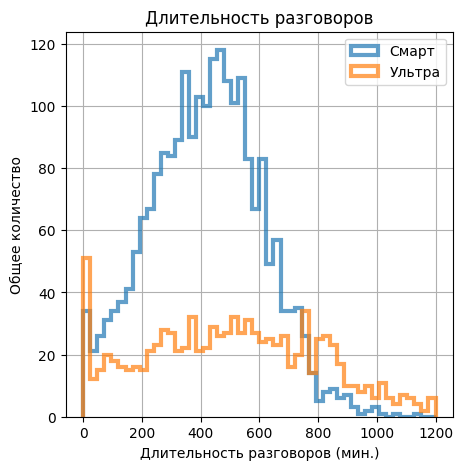

In [31]:
print('Данные о длительности разговоров абонентов с тарифом "Смарт"')
print('_____________________________________________________________________')
smart['cons_minutes'].describe() # среднее значение и стандартное отклонение
print('Дисперсия равна:', smart['cons_minutes'].var()) # дисперсия
print('')
print('')
print('Данные о длительности разговоров абонентов с тарифом "Ультра"')
print('_____________________________________________________________________')
ultra['cons_minutes'].describe() # среднее значение и стандартное отклонение
print('Дисперсия равна:', ultra['cons_minutes'].var()) # дисперсия

ax = smart.plot(
    kind='hist', y='cons_minutes', histtype='step', range=(0, 1200), bins=50, 
    linewidth=3, alpha=0.7, label='Смарт', figsize = (5,5), title='Длительность разговоров')
ultra.plot(
    kind='hist', y='cons_minutes', histtype='step',range=(0, 1200), bins=50,
    linewidth=3, alpha=0.7, label='Ультра', ax=ax, grid=True, legend=True)
plt.xlabel('Длительность разговоров (мин.)')
plt.ylabel('Общее количество')

#### Вывод
Средние и медианные значения у тарфиов очень близки 418 и 422 у пользователей с тарифом "Смарт", 526 и 517 у "Ультры", что говорит об отсутствии в данных сильно завышенных или заниженных значений. Несмотря на то, что данных по тарифу "Смарт" больше в два раза, стандартное отклонение - 190, а  у "Ультры" - 318, что объясняется бОльшим разнообразием данных в этом тарифе. Дисперсия "Смарта" - 36219, "Ультры" - 100874. Проанализировав полученную гистограмму можно сделать выводы о том что, данные в тарифе "Ультра" распределены практически равномерно, без пиковых значений - абоненты расходуют от 50 до 900 минут практически одинаково. Основная часть абонентов "Смарта" в среднем проговаривает за месяц от 100 до 700 минут. У обоих тарифов есть часть значений, равных 0, что говорит о неиспользовании услуги в определенные месяца или определенными абонентами (кто-то пользуется исключительно интернетом).

### Количество отправленных сообщений

Данные о количестве отправленных сообщений абонентов с тарифом "Смарт"
___________________________________________________________________________


count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: cons_sms, dtype: float64

Дисперсия равна: 796.8129584480083


Данные о количестве отправленных сообщений абонентов с тарифом "Ультра"
___________________________________________________________________________


count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: cons_sms, dtype: float64

Дисперсия равна: 2285.266142544674


<AxesSubplot: title={'center': 'Количество отправленных сообщений'}, ylabel='Frequency'>

Text(0.5, 0, 'Количество сообщений (в месяц)')

Text(0, 0.5, 'Общее количество')

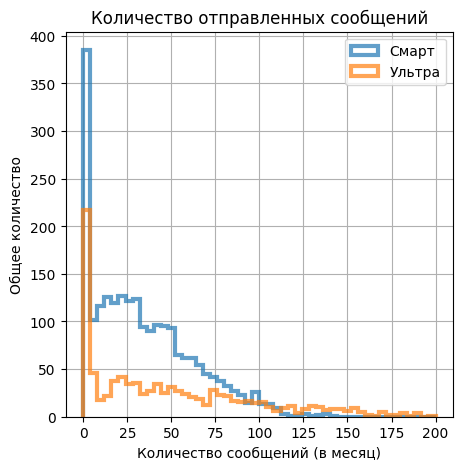

In [32]:
print('Данные о количестве отправленных сообщений абонентов с тарифом "Смарт"')
print('___________________________________________________________________________')
smart['cons_sms'].describe() # среднее значение и стандартное отклонение
print('Дисперсия равна:', smart['cons_sms'].var()) # дисперсия
print('')
print('')
print('Данные о количестве отправленных сообщений абонентов с тарифом "Ультра"')
print('___________________________________________________________________________')
ultra['cons_sms'].describe() # среднее значение и стандартное отклонение
print('Дисперсия равна:', ultra['cons_sms'].var()) # дисперсия

ax = smart.plot(
    kind='hist', y='cons_sms', histtype='step', range=(0, 200), bins=50, 
    linewidth=3, alpha=0.7, label='Смарт', figsize = (5,5), title='Количество отправленных сообщений')
ultra.plot(
    kind='hist', y='cons_sms', histtype='step',range=(0, 200), bins=50,
    linewidth=3, alpha=0.7, label='Ультра', ax=ax, grid=True, legend=True)
plt.xlabel('Количество сообщений (в месяц)')
plt.ylabel('Общее количество')

#### Вывод
Среднее и медиана "Смарта" - 33 и 28, "Ультры" - 49 и 38 сообщений соответственно. Дисперсия "Смарта" - 797, стандартное отклонение - 28, "Ультры" - 2285 и 48 соответственно. При анализе гистограммы внимание привлекает большое количество нулевых значений, что логично, услуга отправки текстовых сообщений вытесняется интернет-мессенджерами. Данные в тарифе "Ультра" распрделены равномерно, не имеют пиков (за исключением 0), их основная часть укладывается в показатели от 20 до 120, абоненты "Смарта" отправляют в основном от 10 до 70 сообщений в месяц.

### Израсходованный интернет-трафик

Данные о трафике, израсходованном абонентами с тарифом "Смарт"
__________________________________________________________________


count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: cons_traffic_gb, dtype: float64

Дисперсия равна: 33.02870517811161


Данные о трафике, израсходованном абонентами с тарифом "Ультра"
__________________________________________________________________


count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: cons_traffic_gb, dtype: float64

Дисперсия равна: 97.09168626965459


<AxesSubplot: title={'center': 'Объем расходуемого интернет-трафика'}, ylabel='Frequency'>

Text(0.5, 0, 'Объем интернет-трафика (Гб)')

Text(0, 0.5, 'Общее количество')

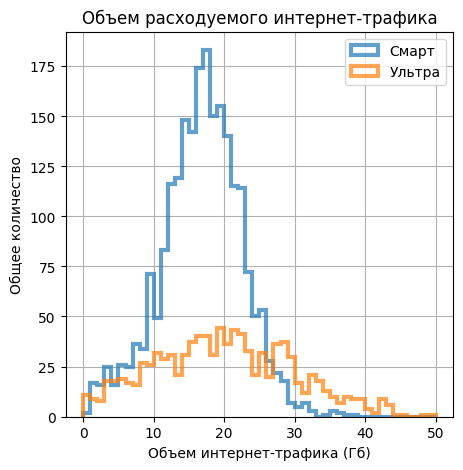

In [33]:
print('Данные о трафике, израсходованном абонентами с тарифом "Смарт"')
print('__________________________________________________________________')
smart['cons_traffic_gb'].describe() # среднее значение и стандартное отклонение
print('Дисперсия равна:', smart['cons_traffic_gb'].var()) # дисперсия
print('')
print('')
print('Данные о трафике, израсходованном абонентами с тарифом "Ультра"')
print('__________________________________________________________________')
ultra['cons_traffic_gb'].describe() # среднее значение и стандартное отклонение
print('Дисперсия равна:', ultra['cons_traffic_gb'].var()) # дисперсия

ax = smart.plot(
    kind='hist', y='cons_traffic_gb', histtype='step', range=(0, 50), bins=50, 
    linewidth=3, alpha=0.7, label='Смарт', figsize = (5,5), title='Объем расходуемого интернет-трафика')
ultra.plot(
    kind='hist', y='cons_traffic_gb', histtype='step',range=(0, 50), bins=50,
    linewidth=3, alpha=0.7, label='Ультра', ax=ax, grid=True, legend=True)
plt.xlabel('Объем интернет-трафика (Гб)')
plt.ylabel('Общее количество')

#### Вывод
Среднее и медиана "Смарта" - 16 и 17, "Ультры" - одинаковое значение в 19 гигабайт. Эти значения идентичны друг другу благодаря правильному распределению данных и отсутствию выбросов. Дисперсия "Смарта" - 33, стандартное отклонение - 6, "Ультры" - 97 и 10 соответственно. Практически полное отсутствие нулевых значений говорит о том, что интернетом в наши времена пользуются все. Пользователи "Смарта" в основном расходуют от 10 до 25 Гб трафика в месяц, в "Ультре", данные как всегда распределены практически равномерно по оси, рользователи этого тарифа в основном расходуют от 10 до 30 Гб. 

### Вывод

В данном разделе были исследованы показатели использования основных услуг пользователями тарифов "Смарт" и "Ультра" за месяц. Абонентов "Смарта" почти в два раза больше, чем абонентов "Ультры", но при этом, последние разговаривают и отправляют сообщений больше, однако в вопросе использования интернета, абоненты остаются солидарными и расходуют практически одинаковое количество трафика. Учитывая, что большое количество абонентов "Смарта" не укладываются в тарифные лимиты, а плата за услуги сверх пакета достаточно высока, можно предположить, что в среднем они тратят больше за месяц, чем абоненты "Ультры".

## Проверка гипотез

### Гипотеза 1: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".

H₀ - Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова.

H₁ - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [34]:
smart_total_fee = smart['total_fee']
ultra_total_fee = ultra['total_fee']

In [35]:
smart_total_fee

8       1150
9        550
10       550
11      1150
12      1550
        ... 
3211    1750
3212     550
3213    1150
3214    1513
3215     598
Name: total_fee, Length: 2229, dtype: int64

In [36]:
alpha = 0.05 # стандартный критический уровень статистической значимости
results = st.ttest_ind(smart_total_fee, ultra_total_fee, equal_var=True)

print('средняя выручка с тарифом "Смарт": {:.0f}'.format(smart_total_fee.mean()))
print('средняя выручка с тарифом "Ультра": {:.0f}'.format(ultra_total_fee.mean()))
print()
print('p-значение: {}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

средняя выручка с тарифом "Смарт": 1290
средняя выручка с тарифом "Ультра": 2070

p-значение: 1.4229814360764067e-160

Отвергаем нулевую гипотезу


p-значение значительно меньше критического уровня статистической значимости, что говорит нам о неравенстве двух совокупностей, в связи с чем отвергаем нулевую гипотезу. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

### Гипотеза 2: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".

H₀ - Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

H₁ - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [37]:
moscow_total_fee = data.query('city == "Москва"')['total_fee']
region_total_fee = data.query('city != "Москва"')['total_fee']

In [38]:
alpha = 0.05 # стандартный критический уровень статистической значимости
results = st.ttest_ind(moscow_total_fee, region_total_fee, equal_var=True)

print('средняя выручка пользователей из Москвы: {:.0f}'.format(moscow_total_fee.mean()))
print('средняя выручка пользователей из других регионов: {:.0f}'.format(region_total_fee.mean()))
print()
print('p-значение: {:.10f}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

средняя выручка пользователей из Москвы: 1547
средняя выручка пользователей из других регионов: 1525

p-значение: 0.5440152912

Не получилось отвергнуть нулевую гипотезу


p-значение больше критического уровня статистической значимости, что говорит нам о равенстве двух совокупностей, в связи с чем нулевую гипотезу опровергнуть не получается. Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

### Гипотеза 3: "Средняя длительность разговоров у пользователей тарифов «Ультра» и «Смарт» не различается ".

H₀ - Средняя продолжительность разговоров у пользователей тарифов «Ультра» и «Смарт» не различается.

H₁ - Средняя продолжительность разговоров у пользователей тарифов «Ультра» и «Смарт» различается.

In [39]:
smart_cons_minutes = smart['cons_minutes']
ultra_cons_minutes = ultra['cons_minutes']

In [40]:
alpha = 0.05 # стандартный критический уровень статистической значимости
results = st.ttest_ind(smart_cons_minutes, ultra_cons_minutes, equal_var=True)

print('средняя продолжительность разговоров в тарифе "Смарт": {:.0f}'.format(smart_cons_minutes.mean()))
print('средняя продолжительность разговоров в тарифе "Ультра": {:.0f}'.format(ultra_cons_minutes.mean()))
print()
print('p-значение: {:.10f}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

средняя продолжительность разговоров в тарифе "Смарт": 418
средняя продолжительность разговоров в тарифе "Ультра": 527

p-значение: 0.0000000000

Отвергаем нулевую гипотезу


p-значение значительно меньше критического уровня статистической значимости, что говорит нам о неравенстве двух совокупностей, в связи с чем отвергаем нулевую гипотезу. Средняя продолжительность разговоров у пользователей тарифов «Ультра» и «Смарт» различается.

### Вывод

Проверив выдвинутые гипотезы, можем сделать вывод о том, что за услуги связи по всей стране платят примерно одинаково, абоненты с тарифом "Ультра" платят за связь немного меньше абонентов с тарифом "Смарт".

## Общий вывод и рекомендации бизнесу

В результате проведенного исследования, было изучено поведение абонентов двух разных тарифных планов, установлено какое количество средств они тратят ежемесячно на услуги связи, какие услуги связи более востребованы, а какие менее. Подводя итог, можно сделать следующие выводы: 
1. Пользователи "Ультры" в среднем больше разговаривают по телефону, отправляют сообщения и пользуются интернетом, чем пользователи "Смарта", однако при этом расходуют около 20% минут разговора, 5% сообщений и 65% интернет-трафика, включенных в основной тарифный план.
2. Абоненты с тарифным планом "Смарт" в основном пользуются услугами в соответствии с предоставленным базовым пакетом, исключение составляет интернет-трафик, по которому абоненты незначительно переплачивают сверх тарифного пакета.
3. Учитывая то, что ежемесячная абонентская плата по тарифу "Смарт" в 3,5 раза ниже абонентской платы за "Ультру", а как нам стало известно, абоненты "Смарта" в основном не переплачивают сверх тарифного пакета, общая сумма средств затрачиваемая ими в месяц на услуги связи составляет 60% от трат абонентов с "Ультрой".

Однозначно ответить на главный вопрос исследования, какой же из представленных тарифов лучше, невозможно, так как "Ультра" хоть и кажется более прибыльной, однако не стоит забывать, что исследование проводилось исходя из данных небольшого отрезка времени. Можно предположить, что часть абонентов с тарифным планом "Ультра", осознав, что не расходует и половины включенных в пакет услуг, предпочтет альтернативные варианты, с меньшей абонентской платой и пакетом услуг.
Основываясь на результатах исследования поведения пользователей "Смарта", можно предположить, что данные абоненты стараются не пересекать лимиты, установленные базовым пакетом услуг, так как плата за использование услуг сверх пакета высока. Несмотря на это, они все равно чаще используют такую востребованую услугу как мобильный интернет, сверх установленного лимита. По обратной аналогии с пользователями "Ультры", можно предположить, что эту группу абонентов может привлечь тарифный пакет, с увеличенными базовыми лимитами на услуги.
Исходя из изложенного, учитывая плюсы и минусы исследуемых тарифов, можно ответить на главный вопрос - лучшим тарифом мог бы оказаться тариф "Медиум", включающий в себя средние показатели тарифов "Ультра" и "Смарт".
    
Касательно общих наблюдений и тенденций, можно выделить следующие:
1. Самая востребованная услуга - мобильный интернет.
2. Услугой отправки текстовых сообщений абоненты практически не пользуются.
3. Затраты на связь по всей стране относительно равны.